# NETFLIX DATA ANALYTSIS

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [230]:
df = pd.read_csv('netflix_titles.csv')

In [231]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


In [233]:
df.duplicated().sum()

np.int64(0)

In [234]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### Dropping the unrequired columns.

In [235]:
df.drop(columns= ['show_id','director','cast','description'],inplace=True)

In [236]:
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


#### Dealing With Null Values in Dataset.

In [237]:
df.isnull().sum()

type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [238]:
df.fillna('Unknown',inplace=True)

In [239]:
df.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       8807 non-null   object
 3   date_added    8807 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating        8807 non-null   object
 6   duration      8807 non-null   object
 7   listed_in     8807 non-null   object
dtypes: int64(1), object(7)
memory usage: 309.7+ KB


#### Changing 'date_added' column into datetime data type.

In [241]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print(df['date_added'].dtypes)

datetime64[ns]


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   country       8807 non-null   object        
 3   date_added    8709 non-null   datetime64[ns]
 4   release_year  8807 non-null   int64         
 5   rating        8807 non-null   object        
 6   duration      8807 non-null   object        
 7   listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 344.1+ KB


#### we'd split listed_in column into a list and than explode our dataframe to have only one genre per row for each movie or tv show.

In [243]:
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in').reset_index(drop=True)
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          19323 non-null  object        
 1   title         19323 non-null  object        
 2   country       19323 non-null  object        
 3   date_added    19120 non-null  datetime64[ns]
 4   release_year  19323 non-null  int64         
 5   rating        19323 non-null  object        
 6   duration      19323 non-null  object        
 7   listed_in     19323 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 754.9+ KB


# Data Visualization

#### Create visualizations to represent the distribution of content over different genres.

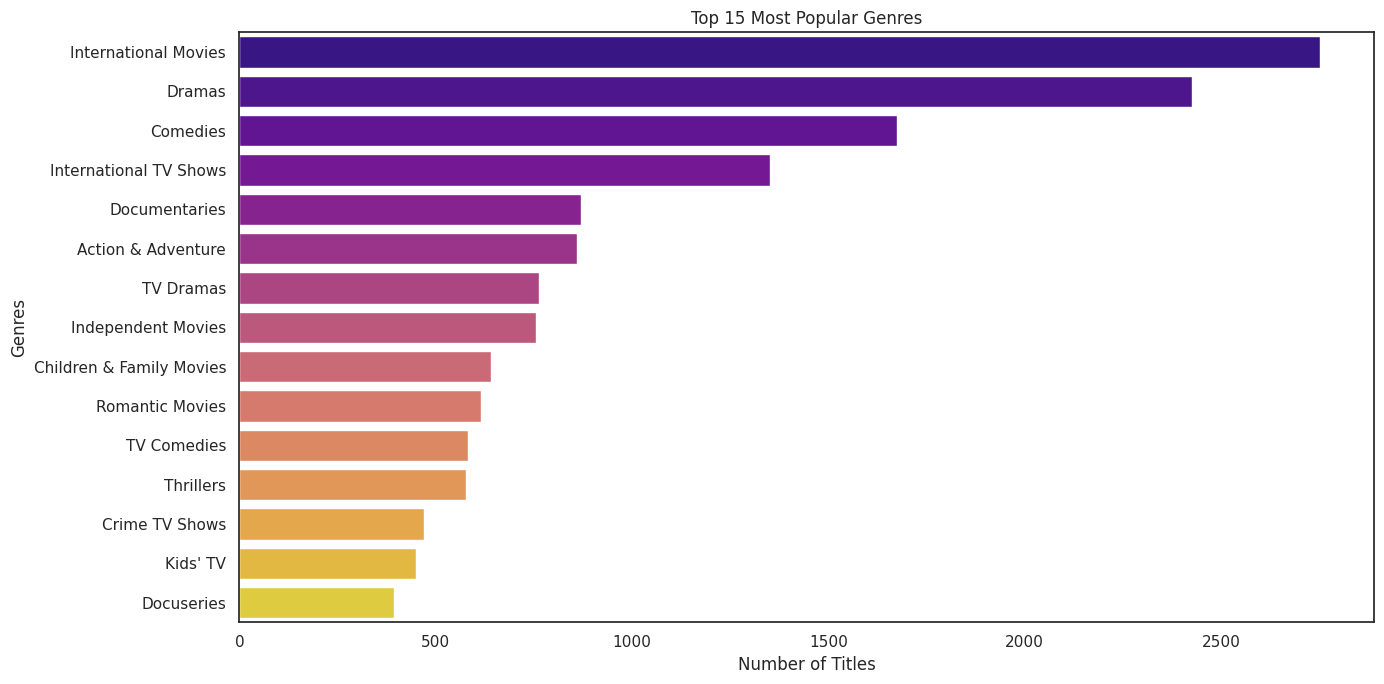

In [245]:
top_genres =df['listed_in'].value_counts().head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')
plt.title('Top 15 Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

#### Visualize the distribution of content across release years.

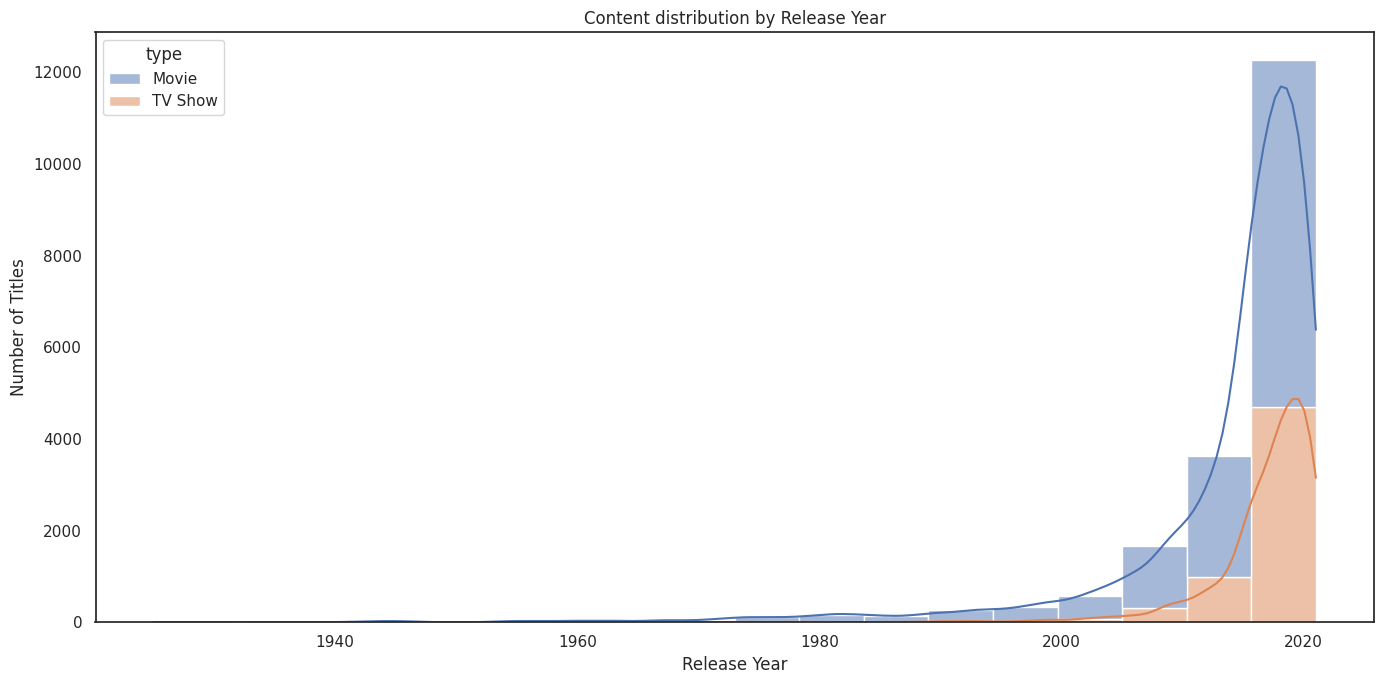

In [246]:
plt.figure(figsize=(14, 7))
sns.histplot(df,x= 'release_year', bins=18, kde=True, hue='type',multiple='stack')
plt.title('Content distribution by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()
    

#### Explore the geographical distribution of content.

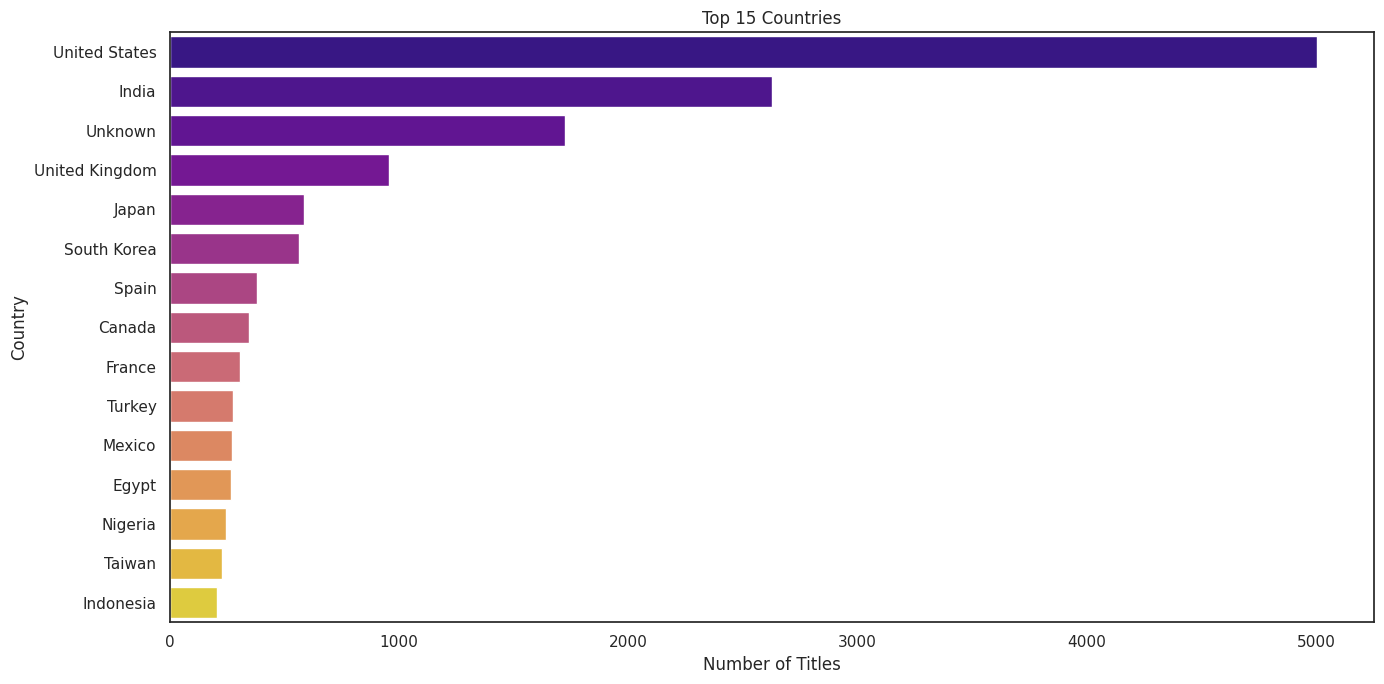

In [247]:
top_country =df['country'].value_counts().head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x= top_country.values, y= top_country.index, palette='plasma')
plt.title('Top 15 Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#### If there's a temporal component, perform time series analysis to identify trends and patterns over time.

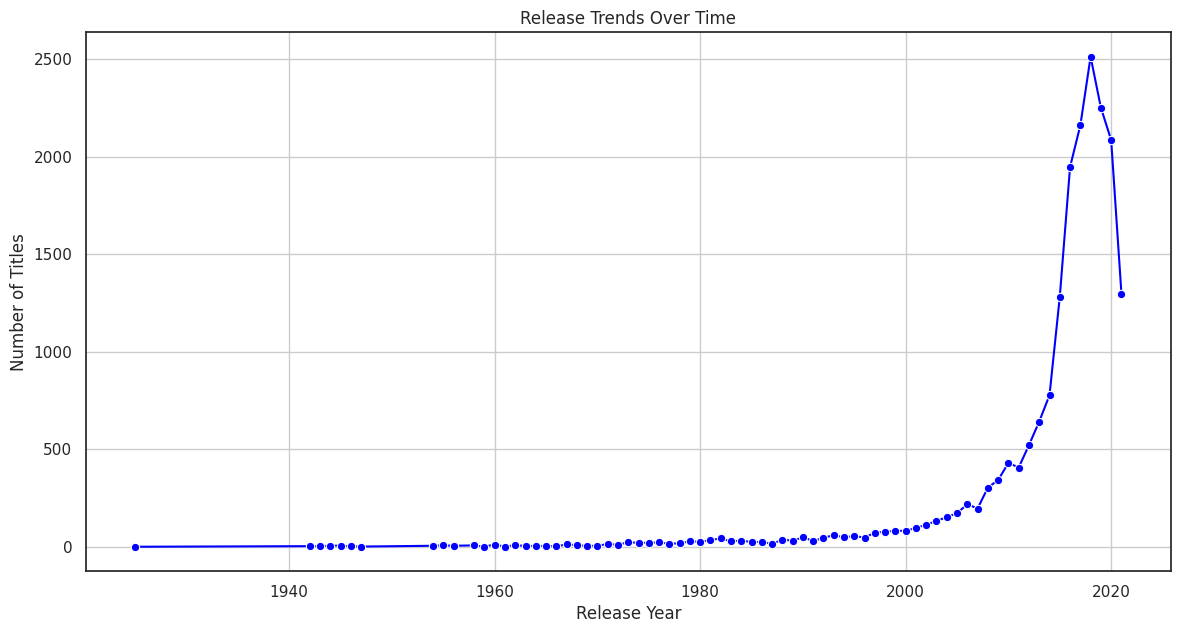

In [248]:
release_trends = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=release_trends.index, y=release_trends.values,marker='o',color='blue')
plt.grid(True)
plt.title('Release Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

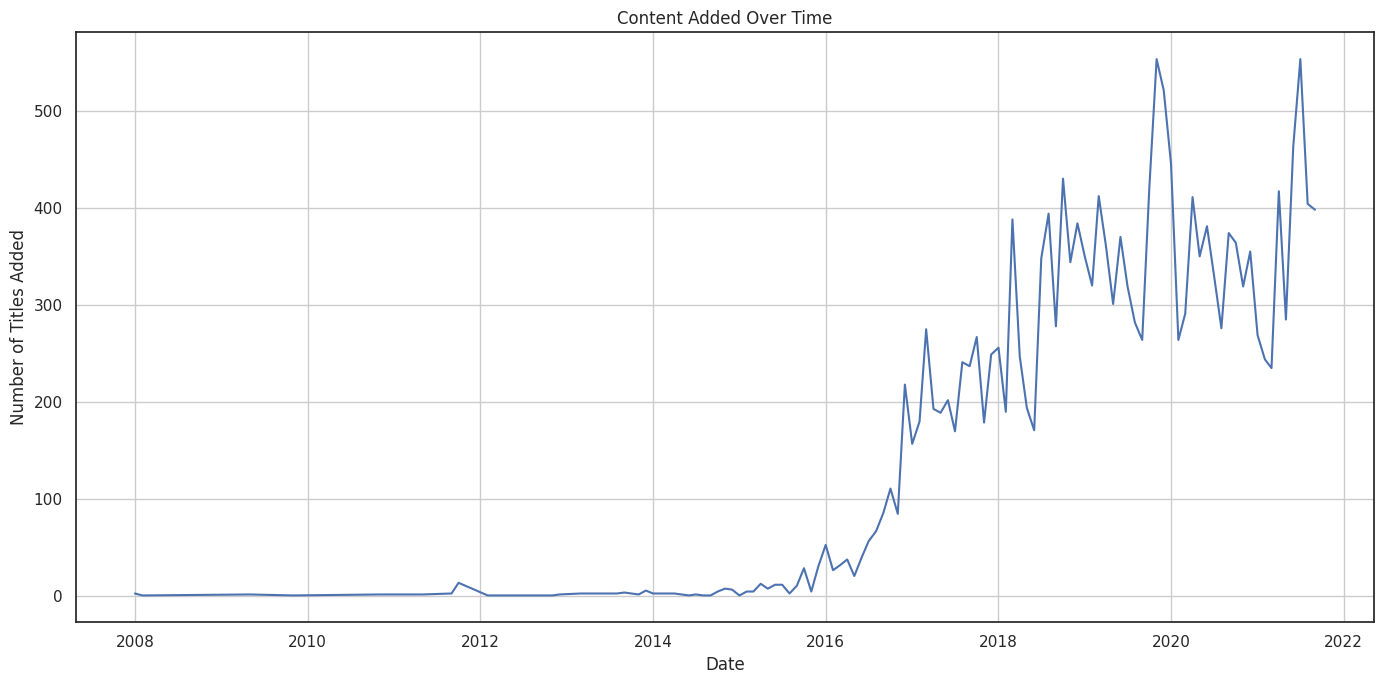

In [249]:
df['year_month']= df['date_added'].dt.to_period('M')
date = df.groupby('year_month').size()

date.index = date.index.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(x=date.index, y=date.values)
plt.title('Content Added Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Analyze the distribution of content ratings.

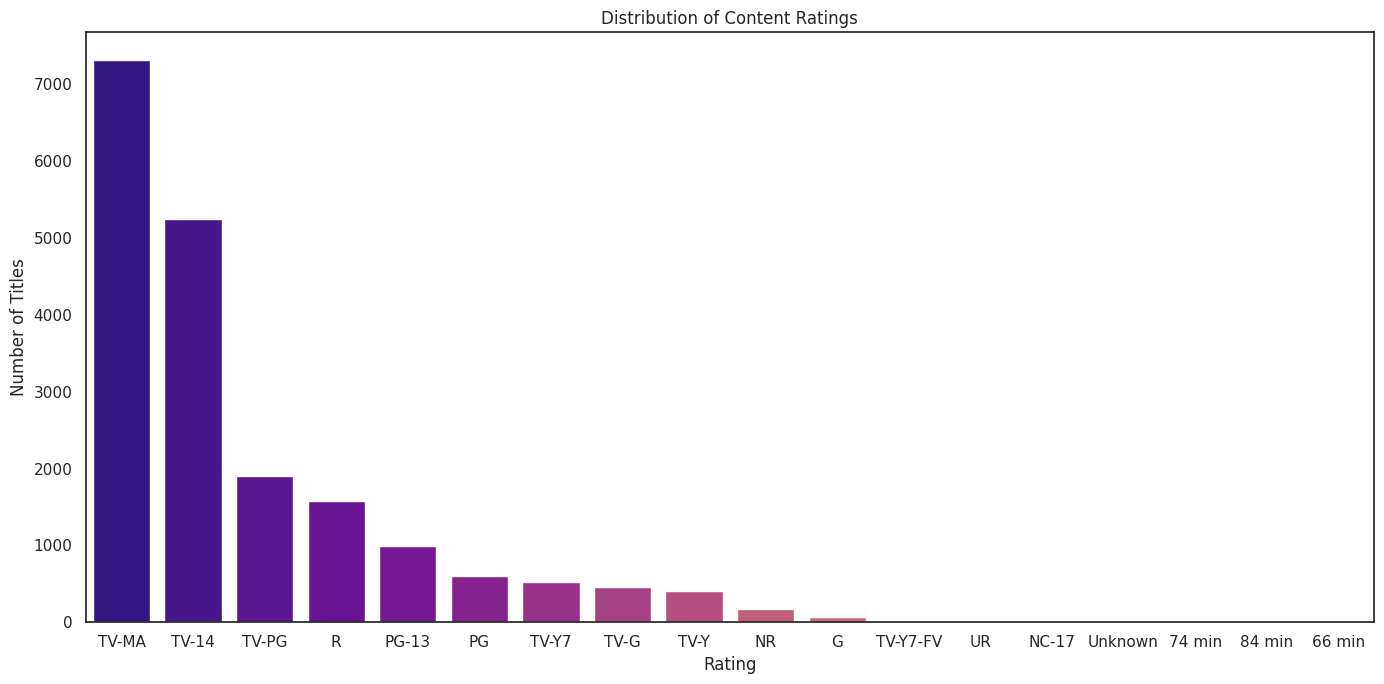

In [250]:
rating_count =df['rating'].value_counts()

plt.figure(figsize=(14, 7))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='plasma')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

#### Explore the length of movies or episodes and identify any trends.

In [251]:
#Separate movies and TV shows

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

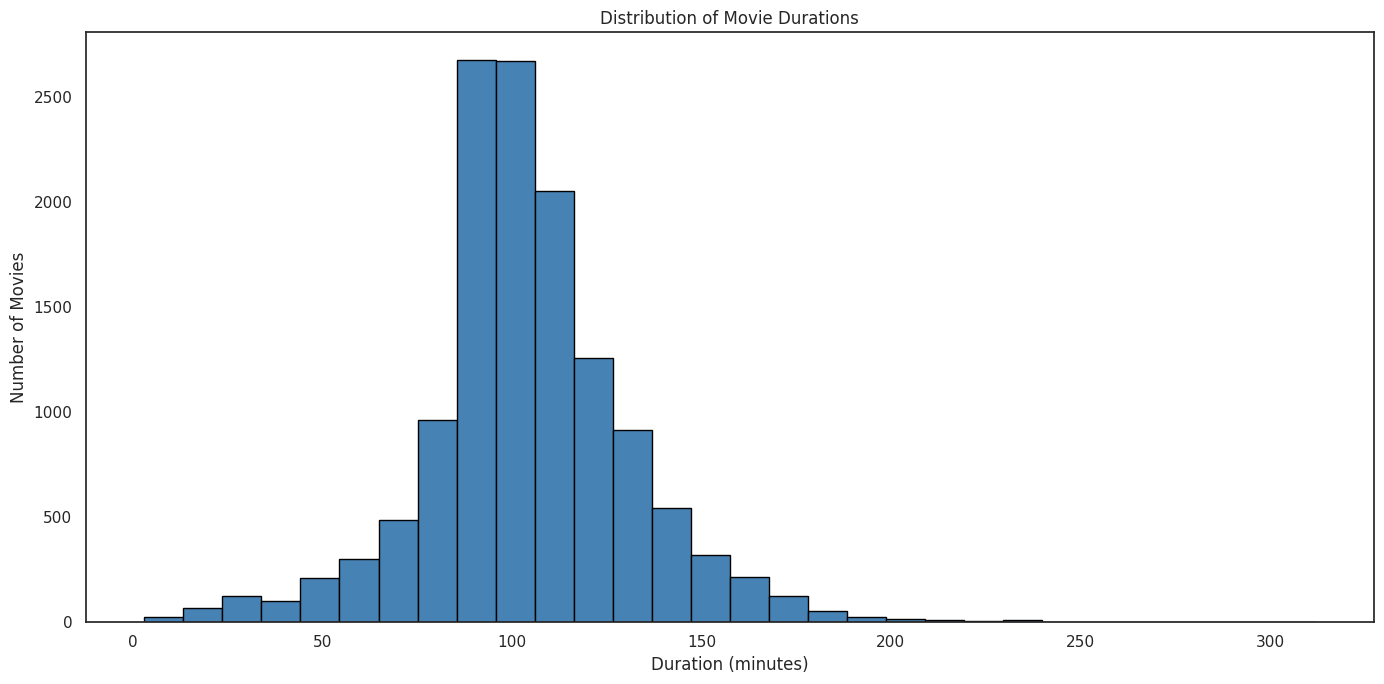

In [252]:
# Extract numeric value from duration
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(14, 7))
plt.hist(movies['duration_min'], bins=30,color='steelblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


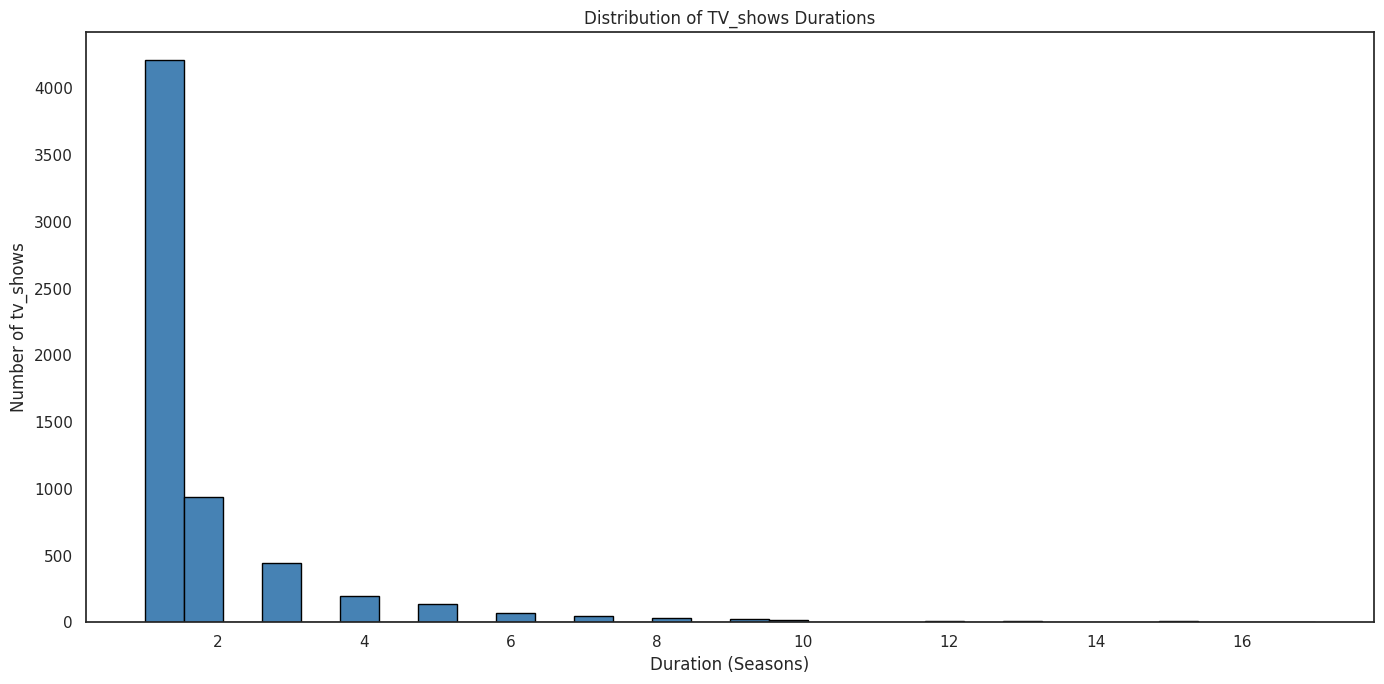

In [253]:
tv_shows['duration_min'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(14, 7))
plt.hist(tv_shows['duration_min'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of TV_shows Durations')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Number of tv_shows')
plt.tight_layout()
plt.show()

#### Analyze trends in the popularity of different genres over time.

<Figure size 1400x800 with 0 Axes>

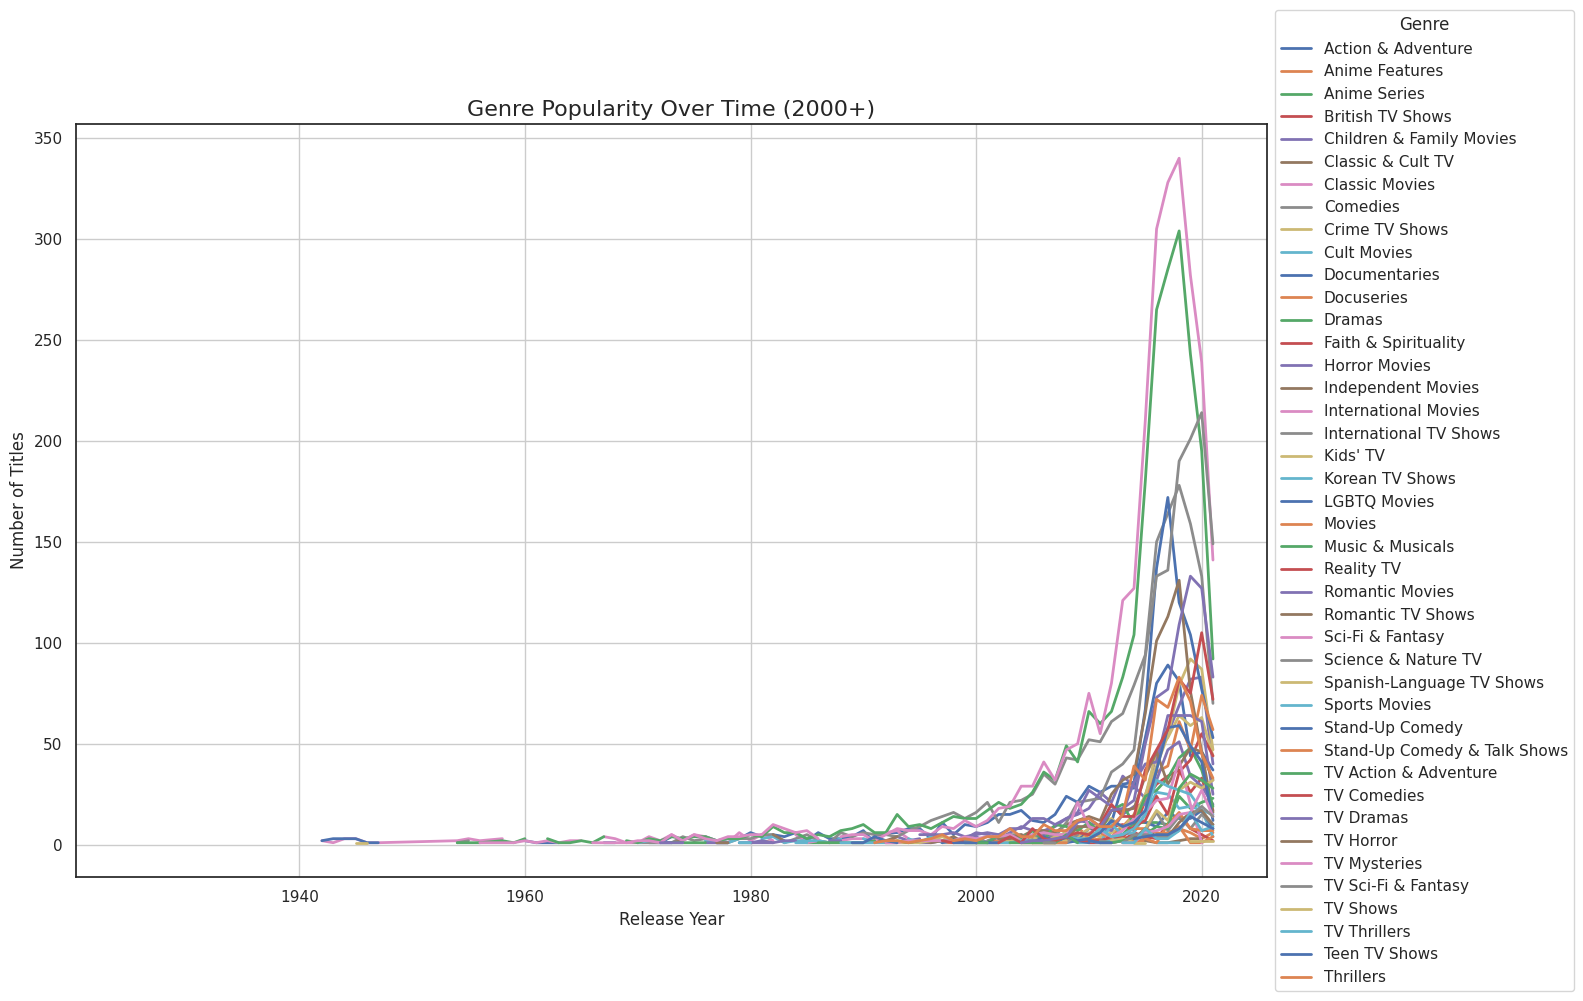

In [254]:
genres_tends = df.groupby(['release_year','listed_in']).size().reset_index(name='count')
genre_pivot = genres_tends.pivot(index='release_year', columns='listed_in', values='count')

plt.figure(figsize=(14,8))

genre_pivot.plot(kind='line', figsize=(16,10), linewidth=2)
plt.title('Genre Popularity Over Time (2000+)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()




#### Further explore the distribution of content across different countries and regions.

In [255]:
# Keep only relevant columns
df_country = df[['release_year', 'country']].dropna()

# Split by commas and explode into multiple rows
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')

country_counts = df_country['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

In [256]:
# Group by release year and country
country_year = df_country.groupby(['release_year', 'country']).size().reset_index(name='count')

top_countries = country_counts.head(10)['country']
country_year_top = country_year[country_year['country'].isin(top_countries)]

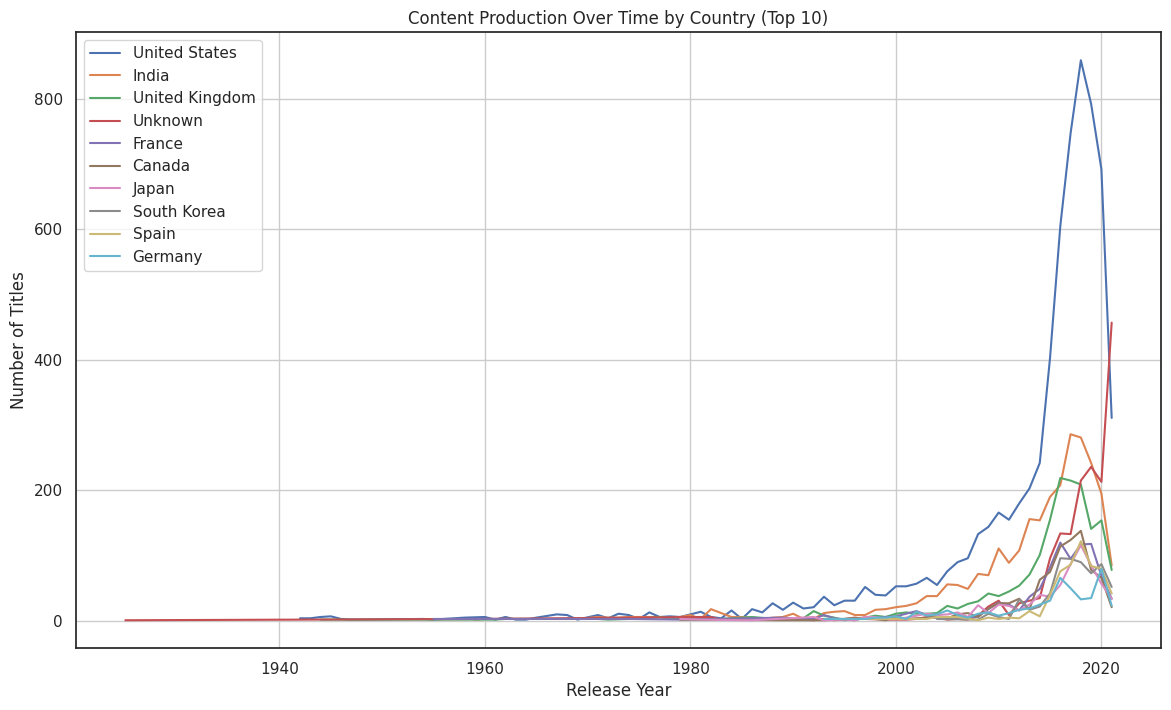

In [257]:
plt.figure(figsize=(14, 8))
for country in top_countries:
    subset = country_year_top[country_year_top['country'] == country]
    plt.plot(subset['release_year'], subset['count'], label=country)

plt.title('Content Production Over Time by Country (Top 10)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()
     

#### Investigate potential correlations between variables (e.g., ratings and duration).

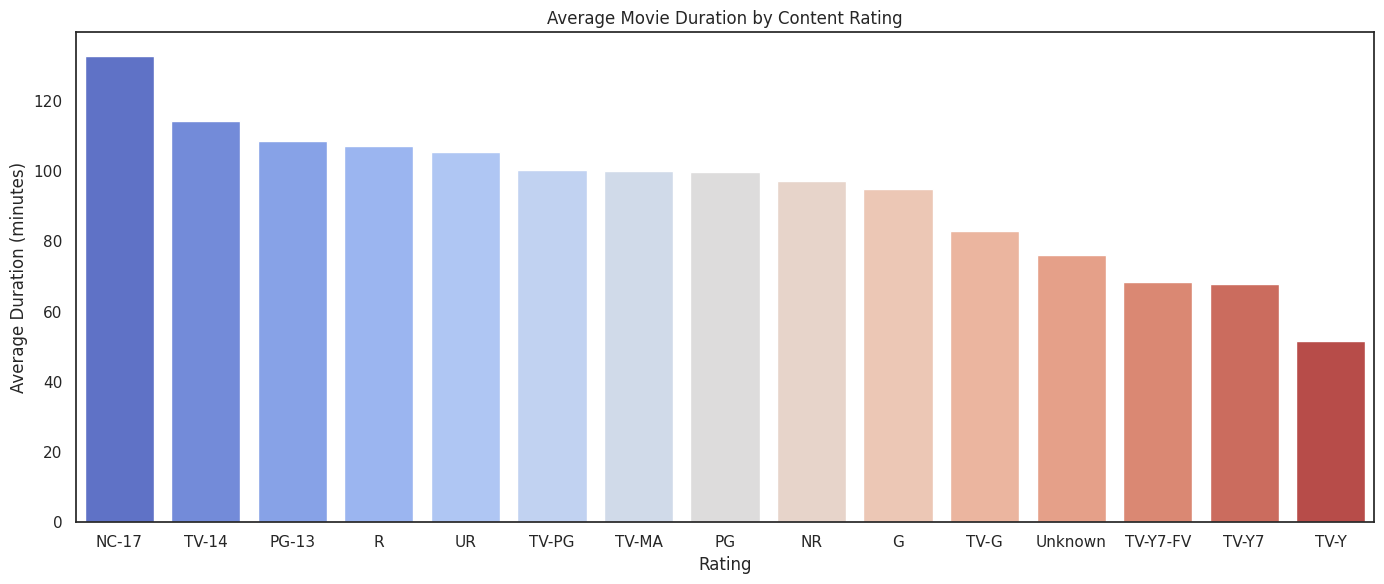

In [258]:
movies = df[df['type'] == 'Movie']

movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
df_clean = movies.dropna(subset=['duration_min', 'rating'])

# Group by rating and calculate mean duration
avg_duration = df_clean.groupby('rating')['duration_min'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='coolwarm')
plt.title('Average Movie Duration by Content Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()
plt.show()

#### Evaluate the diversity of content by analyzing the number of unique genres and categories.

In [259]:
df['listed_in'].value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [260]:
genre_series = df['listed_in'].dropna().str.split(', ')
all_genres = genre_series.explode()
genre_counts = all_genres.value_counts()


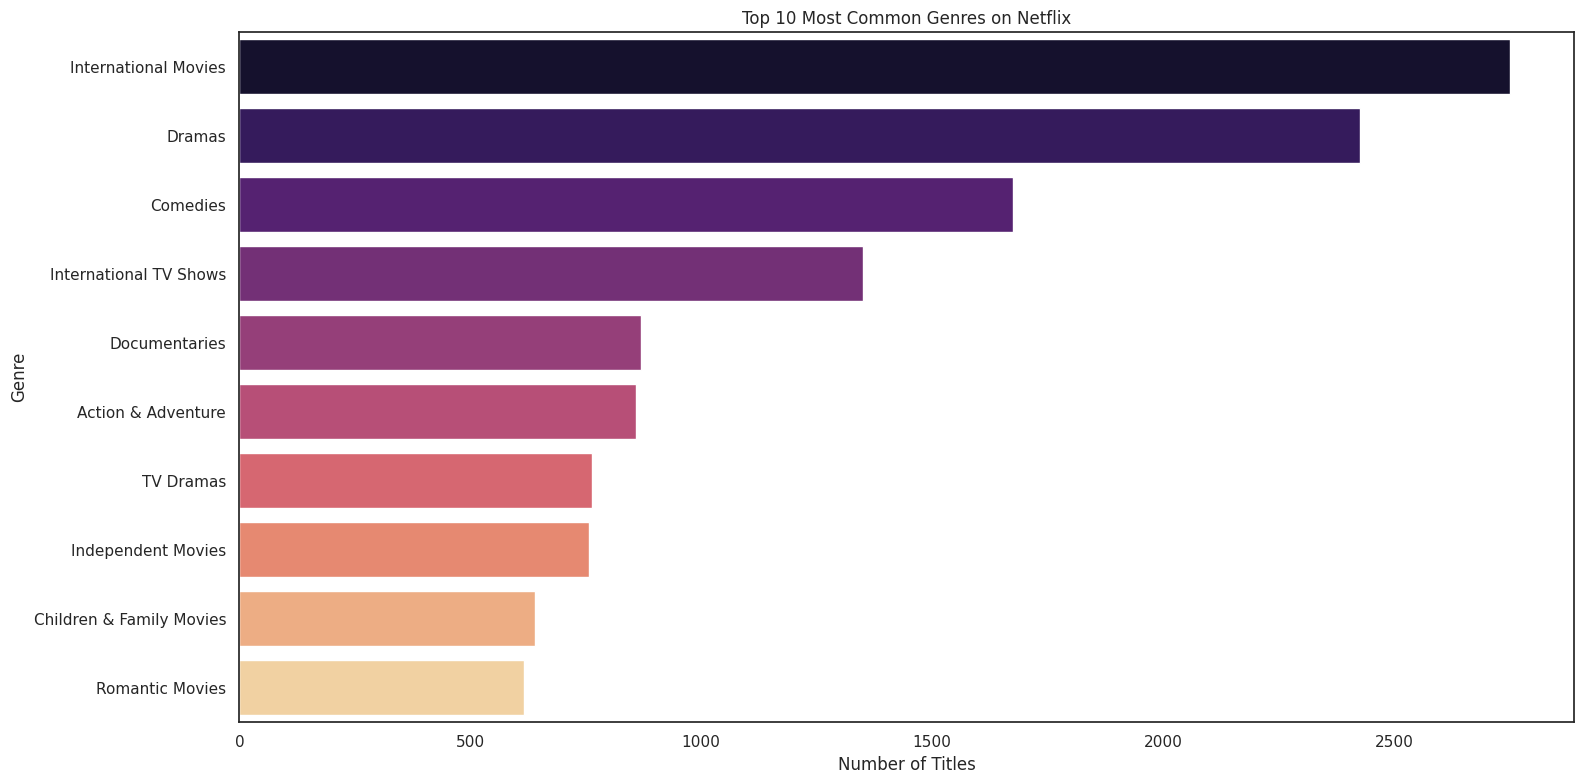

In [261]:
plt.figure(figsize=(16, 8))
top_genres = genre_counts.head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

#### Explore how the characteristics of content (e.g., duration, ratings) have evolved over the years

In [262]:
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)
tv_shows_df['num_seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

In [263]:
# Group movies & tv shows by release year

movies_yearly = movies_df.groupby('release_year').agg({
    'duration_minutes': 'mean',
    'rating': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

tv_yearly = tv_shows_df.groupby('release_year').agg({
    'num_seasons': 'mean',
    'rating': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

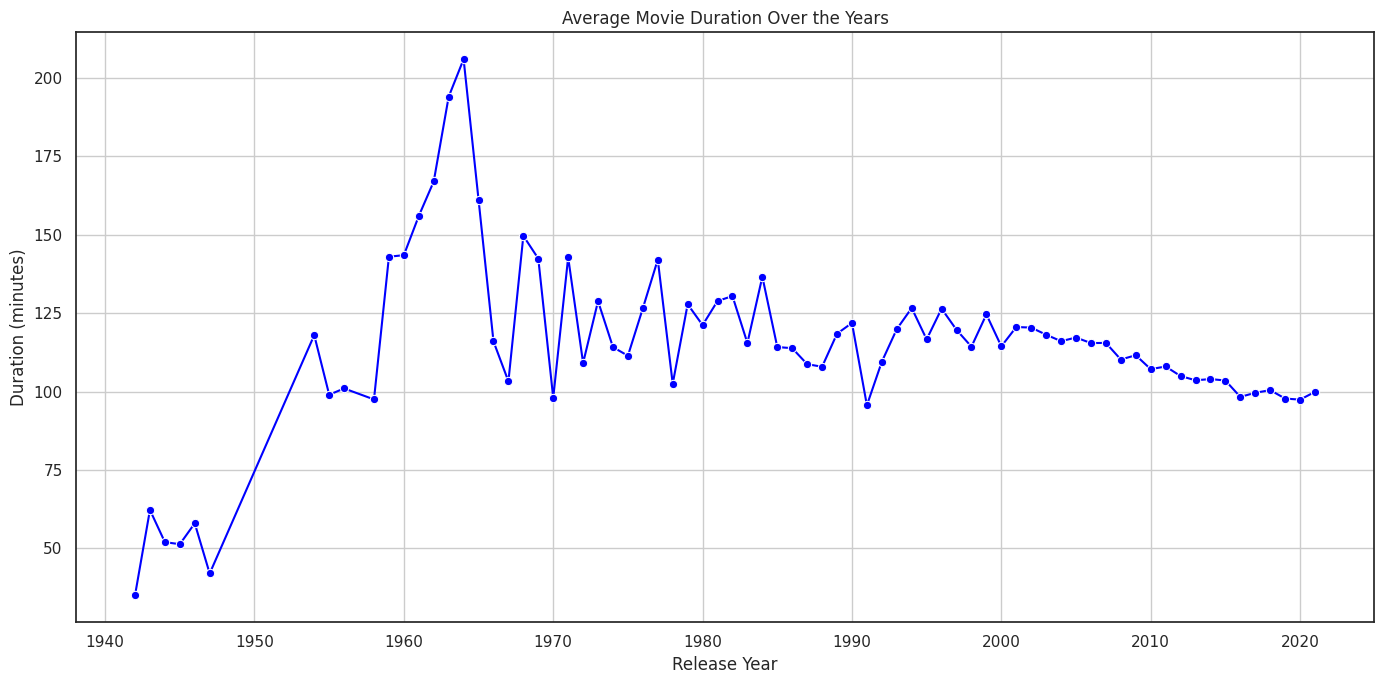

In [264]:
# Movie Duration Trend

plt.figure(figsize=(14, 7))
plt.grid(True)
sns.lineplot(data=movies_yearly, x='release_year', y='duration_minutes', color='blue', marker='o')
plt.title("Average Movie Duration Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()

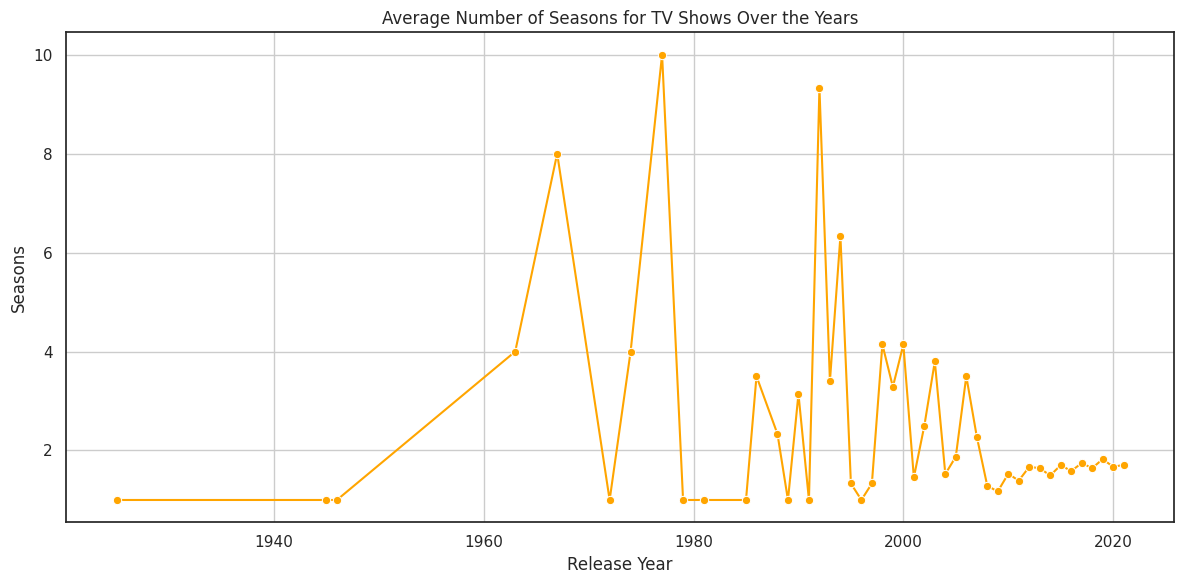

In [265]:
# TV Show Seasons Trend

plt.figure(figsize=(12, 6))
plt.grid(True)
sns.lineplot(data=tv_yearly, x='release_year', y='num_seasons', marker='o', color='orange')
plt.title("Average Number of Seasons for TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Seasons")
plt.tight_layout()
plt.show()


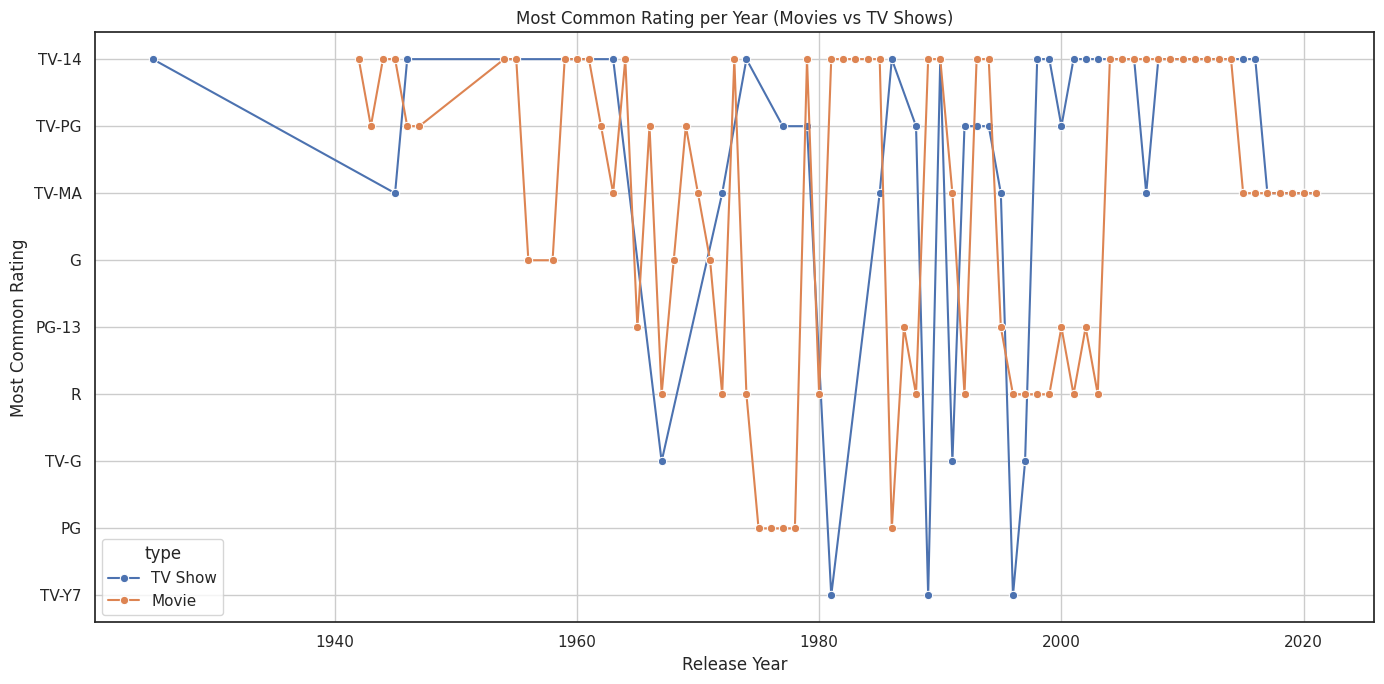

In [266]:
# Most Common Rating Trend

rating_yearly = df.groupby(['release_year', 'type'])['rating'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=rating_yearly, x='release_year', y='rating', hue='type', marker='o')
plt.title("Most Common Rating per Year (Movies vs TV Shows)")
plt.xlabel("Release Year")
plt.ylabel("Most Common Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Investigate whether certain genres or types of content are more popular among users.

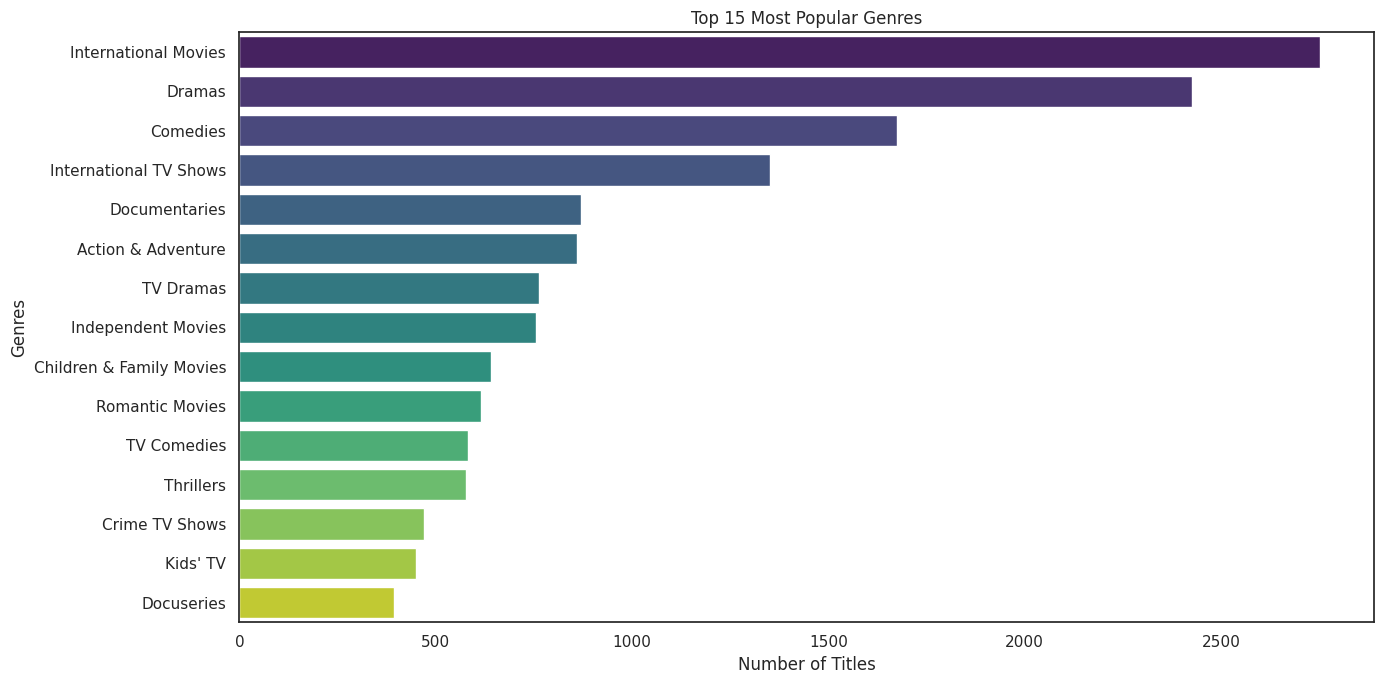

In [267]:
top_genres =df['listed_in'].value_counts().head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()